# TSF Internship Task 1


AIM : Predict the percentage of a student based on the number of study hours
LANGUAGE USED : Python 3.7
IDE : Jupyter Notebook
AUTHOR : Neelam Tanwar


In [1]:
#importing the libraries 
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Displaying Dataset")
data.head()

Displaying Dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.isna() #finding the null values 

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


There is no null value

In [4]:
print("INFORMATION REGARDING DATA SET:_ ")

data.info()   #getting the information about dataset

INFORMATION REGARDING DATA SET:_ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
print("Desccribing the data")
data.describe()

Desccribing the data


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


1. here we could see the important decriptive statistcs regarding our dataset.

# VISUALISATION

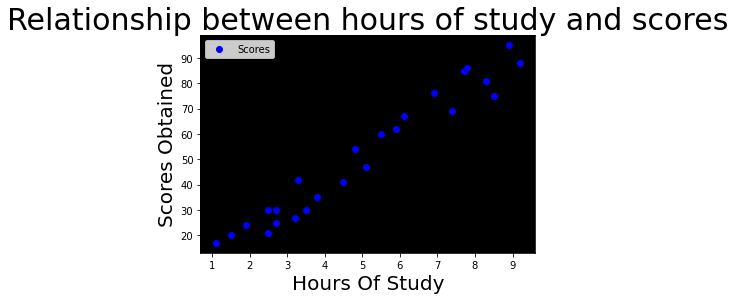

<Figure size 2880x2880 with 0 Axes>

In [15]:

data.plot(x='Hours', y='Scores',style = 'o',color = 'blue')
ax = plt.axes()
plt.title("Relationship between hours of study and scores",fontsize=30)
plt.xlabel("Hours Of Study", fontsize=20)
plt.ylabel("Scores Obtained",fontsize=20)
ax.set_facecolor("black")
plt.figure(figsize=[40,40])
plt.show()

graph shows that relationship between hours of study and score obtained is somehow linear , it means with increase of hours of study , score obtained is also increasing.

# PREPARING THE DATA

In [19]:
#now we divide the data into attributes and labels
x = data.iloc[:,:-1] #independent data
y = data.iloc[:,1] #dependent data

# training the data 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


Data is Trained


In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Data is Trained")

Data is Trained


In [31]:
print (reg.coef_)
print(reg.intercept_) 


[9.91065648]
2.018160041434683


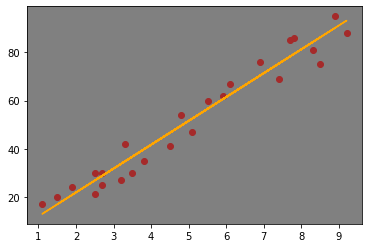

In [37]:
ax = plt.axes()
line = x*reg.coef_+reg.intercept_
plt.scatter(x,y,color='brown')
plt.plot(x,line,color = 'orange')
ax.set_facecolor("grey")
plt.show()

# PREDICTING THE VLAUE AND  COMPARING WITH ACTUAL VALUE

In [42]:
print(x_test)
y_pred = reg.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [48]:
#comparing with actual value
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


<AxesSubplot:>

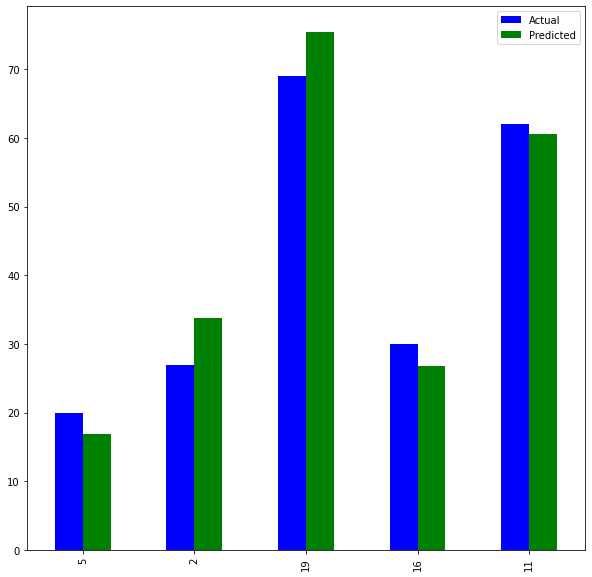

In [54]:
df.plot(kind='bar',figsize=[10,10],color = 'bg')

this shows the difference between predicted value and actual value which is very small

# testing our own data

In [64]:
hours = 9.25

arr = np.array([hours])
arr = arr.reshape(-1,1)
own_pred = reg.predict(arr)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# evaluating model

In [73]:
from sklearn import metrics
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error =',metrics.mean_squared_error(y_test,y_pred))
print("R^2  =", metrics.r2_score(y_test,y_pred))

Mean Absolute Error= 4.183859899002975
Mean Square Error = 21.5987693072174
R^2  = 0.9454906892105356


R^2 is coffecient of determination which shows that precision of prediction is around 94%.

# THANK YOU